## HW4：矩阵本征值与奇异值分解（ddl：11.2）
你的名字：寇皓

你的学号：2300011467


注意：
1. 请使用 Python 语言完成所有编程作业。
2. 允许并鼓励同学间合作，但严禁抄袭别人的代码，且严禁直接复制粘贴由人工智能生成的代码。
3. 请直接在题干后附加代码块和必要的公式，讨论等。
4. 作图请包含 X,Y 轴的标签，以及必要的图例。过多信息的缺失可能会导致丢分。

作业只需要在这个 jupyter notebook 里添加代码，并直接提交修改后的 jupyter notebook，文件请重命名为`姓名-学号-作业x`。

另外请在作业最后**简要说明本次作业完成情况**，以及大致心路历程；另外标注**致谢**，借助了**哪位同学或 ChatGPT 等工具**的帮助，如果自己独立完成的，只需标注"独立完成"。如果上述备注有缺失，会导致作业扣分！


### 1.受周期势调制的环上粒子


“环上粒子”是量子力学中一个重要的模型，它可以用来描述具有环状结构的体系，例如苯环中的$\pi$电子。当不存在势场时，粒子可以在环上自由运动。当引入一个周期性的势场时，粒子的行为会发生改变，原本简并的能级会发生劈裂。在本问题中，你将学习如何利用**基组展开**的方法，将环上粒子的定态薛定谔方程转化为一个**矩阵本征值问题**，并通过编程求解来研究其量子态。

我们从一维环上的薛定谔方程开始，环的半径为1。为简化起见，我们采用原子单位制，令 $\hbar=1$ 以及粒子的有效质量 $m_{eff}=\frac{1}{2}$,则哈密顿算符 $\hat{H}$可以写为：$$\hat{H} = -\frac{d^2}{d\theta^2} + V(\theta)$$其中 $\theta\in[0,2π)$ 是粒子在环上的角坐标。势函数为 $V(\theta)=−3cos(2\theta)$。我们需要求解的本征方程是：$$\hat{H}\Psi(\theta) = E\Psi(\theta)$$

**(a)** 基组展开与矩阵构建

由于体系具有周期性（$\Psi(\theta)=\Psi(\theta+2\pi)$），最自然的基组是**平面波基组**，即傅里叶级数展开。这组正交完备的基函数为：
$$\psi_k(\theta) = \frac{1}{\sqrt{2\pi}}e^{ik\theta}, \quad k = 0, \pm 1, \pm 2, \dots$$
我们可以将被求解的波函数 $\Psi(\theta)$ 按此基组展开：
$$\Psi(\theta) = \sum_{k} c_k \psi_k(\theta) = \sum_{k} c_k \frac{1}{\sqrt{2\pi}}e^{ik\theta}$$
请你将该展开式代入薛定谔方程，并利用基函数的正交性关系 $\int_{0}^{2\pi}\psi_{k^\prime}^{∗}(\theta)\psi_{k}(\theta)d\theta=\delta_{k\prime,k}$，证明我们可以得到如下形式的矩阵本征值方程：$$\sum_{k'} H_{k,k'}c_{k'} = E c_k$$

**请你推导出哈密顿矩阵$H$的表达形式。**（下一个是markdown单元格，你可以在这里用latex语法呈现这个表达形式，或者手写上传图片也可）

提示: 

动能项: 计算动能算符的矩阵元 $T_{k,k'} = \langle\psi_k | -\frac{d^2}{d\theta^2} | \psi_{k'}\rangle$。

势能项: 计算势能算符的矩阵元 $V_{k,k'} = \langle\psi_k | -3\cos(2\theta) | \psi_{k'}\rangle$。请使用欧拉公式 $\cos(\theta) = \frac{e^{i\theta} + e^{-i\theta}}{2}$ 来进行计算。


计算得到 $H=k^2\delta_{kk'}-\frac{3}{2}(\delta_{k',k+2}+\delta_{k',k+2})$ 。

**(b)** 编程求解

在实际计算中，我们必须对无限的基组进行截断。我们只取动量量子数 $k$ 在 $[-k_{max}, k_{max}]$ 范围内的基函数，这样哈密顿矩阵就是一个 $(2k_{max}+1) \times (2k_{max}+1)$ 的有限维矩阵。

1.请设置截断参数 $k_{max}=20$，构建哈密顿矩阵 $H$。

2.使用 `numpy.linalg.eigh`求解该矩阵，获得系统能量最低的**前5个本征值**，并**打印出来**。(同时eigh函数也会给你本征向量）

3.对这5个能量，分别将其对应的本征向量 $c_k$ 通过傅里叶逆变换重构出实空间的波函数 $\Psi_n(\theta)$。绘制出这5个波函数的**概率密度** $|\Psi_n(\theta)|^2$ 在 $\theta \in [0, 2\pi]$ 区间的图像。

[-0.93681849 -0.73326515  2.16593991  3.81429087  4.74677947]


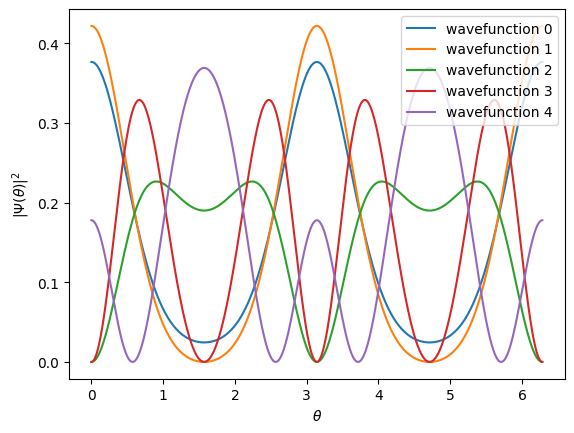

In [1]:
import numpy
import matplotlib.pyplot as plot


def construct_H(kmax: int):
    H = numpy.zeros([2 * kmax + 1, 2 * kmax + 1])
    for i in range(2 * kmax + 1):
        H[i, i] = (i - kmax) ** 2
        if i > 1:
            H[i, i - 2] = -1.5
        if i < 2 * kmax - 1:
            H[i, i + 2] = -1.5
    return H


kmax = 20
H = construct_H(kmax)
eigenvalues, eigenvectors = numpy.linalg.eigh(H)
print(eigenvalues[0:5])

psi = lambda k, theta: numpy.exp(1j * k * theta) / numpy.sqrt(2 * numpy.pi)
thetas = numpy.linspace(0, 2 * numpy.pi, 2**16)
psi_matrix = [psi(k, thetas) for k in range(-kmax, kmax + 1)]
for i in range(5):
    psis = eigenvectors[:, i] @ psi_matrix
    psisquire = numpy.power(numpy.abs(psis), 2)
    plot.plot(thetas, psisquire, label=f'wavefunction {i}')
plot.xlabel(r"$\theta$")
plot.ylabel(r"$|\Psi(\theta)|^2$")
plot.legend()
plot.show()

**(c)** 思考题 

回顾自由环上粒子（$V_0=0$）的能级。它的能级（除了基态）都是二重简并的（$E_k=E_{-k}=k^2$）。对比你计算出的能级，你发现了什么现象？

在本题的结果中，所有能级的能量都不一样，这说明在外加了 $V(\theta)=-3\cos(2\theta)$ 的势能后，能级发生分裂，原本二重简并的能级变成一高一低两个临近的能级，波函数也相应发生变化。

### 2.降噪算法

我们对一根振动的弦进行了测量，得到200个时间点下100个空间位置的位移数据。由于测量误差，数据中包含噪声。你的任务是用**奇异值分解**去除噪声。

**数据准备:请先运行以下代码生成含噪声的测量数据。** D_clean是真实振动数据，用于对比降噪效果。D_noisy是加了随机噪声的数据，这是你需要处理的数据。这个矩阵的每一行的含义是$t_i$时刻下的弦在不同$x_j$处的位移。

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

L = 1.0      # 弦长
c = 10.0     # 波速
N_x = 100    # 空间采样点数
N_t = 201    # 时间采样点数

x = np.linspace(L/101, L*100/101, N_x)
t = np.linspace(0, 1.0, N_t)

# 生成真实信号（3个简正模叠加）
omega = [n * np.pi * c / L for n in [1, 2, 3]]
D_clean = np.zeros((N_t, N_x))
for i, ti in enumerate(t):
    for j, xj in enumerate(x):
        u = (0.1 * np.sin(np.pi * xj / L) * np.cos(omega[0] * ti) +
             0.05 * np.sin(2 * np.pi * xj / L) * np.cos(omega[1] * ti) +
             0.03 * np.sin(3 * np.pi * xj / L) * np.cos(omega[2] * ti))
        D_clean[i, j] = u

# 添加噪声
noise = np.random.normal(0, 0.02, (N_t, N_x))
D_noisy = D_clean + noise

**(a)** **不允许使用 `np.linalg.svd()`**，请自己实现SVD算法，对矩阵 `D_noisy` 进行奇异值分解，并**输出前五个奇异值**：
$$
\mathbf{D}_{\text{noisy}} = \mathbf{U} \boldsymbol{\Sigma} \mathbf{V}^T
$$

提示：

SVD可以通过特征值分解来计算。对于矩阵 $\mathbf{A} \in \mathbb{R}^{m \times n}$（$m \geq n$）：

1.**计算** $\mathbf{A}^T \mathbf{A}$，这是一个 $n \times n$ 的对称正定矩阵

2.**求特征值分解**：$\mathbf{A}^T \mathbf{A} = \mathbf{V} \boldsymbol{\Lambda} \mathbf{V}^T$。可以使用 `np.linalg.eigh()` 求对称矩阵的特征值

3.**计算奇异值**：$\sigma_i = \sqrt{\lambda_i}$

4.**按降序排列**奇异值，并按照降序后奇异值的顺序来相应调整 $\mathbf{V}$ 的列（列是对应奇异值的特征向量，所以列和奇异值要一一对应）

5.**计算左奇异向量**：$\mathbf{U} = \mathbf{A} \mathbf{V} \boldsymbol{\Sigma}^{-1}$

In [3]:
symmetry = D_noisy.T @ D_noisy
eigenvalues, eigenvectors = numpy.linalg.eigh(symmetry)
sigma = numpy.sqrt(eigenvalues)
sigma = sigma[::-1]
eigenvectors = eigenvectors[:, ::-1]
U = D_noisy @ eigenvectors @ numpy.diag(1.0 / sigma)
print(sigma[0:5])

[7.14120706 3.58323075 2.17941521 0.46964951 0.45911781]


**(b)** SVD降噪与可视化

使用第一问得到的SVD分解结果，进行降噪：

1. **仅保留前3个奇异值**，重构数据矩阵：
   $$
   \mathbf{D}_{\text{recon}} = \sum_{k=1}^{3} \sigma_k \mathbf{u}_k \mathbf{v}_k^T
   $$
   其中$ \mathbf{u}_k$是$\mathbf{U}$的列向量，$ \mathbf{v}_k$是$\mathbf{V}$的列向量（注意区分转置）

2.**绘制降噪对比图**：

- 选择3个时刻：$t = 0.1$ s, $0.5$ s, $0.9$ s
- 每个时刻画一个子图，包含三条曲线：
  - 真实数据
  - 含噪数据
  - SVD降噪后
    
  **请选择合适的颜色与线条样式让每个曲线清晰可见**
 

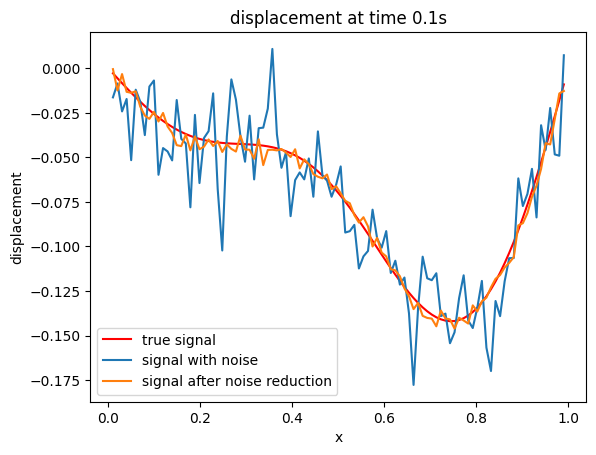

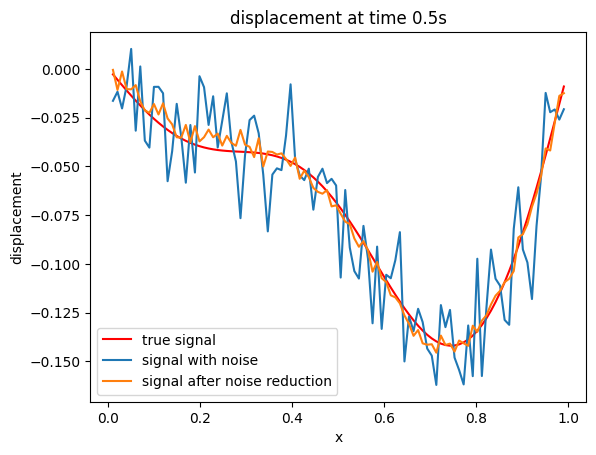

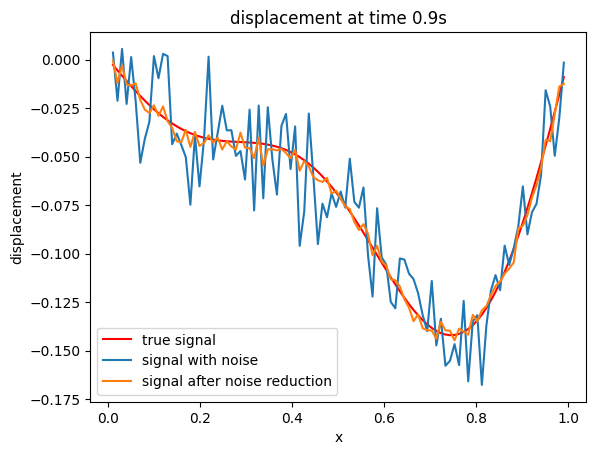

In [4]:
threshold = 3
D_recon = U[:, 0:threshold] @ numpy.diag(sigma[0:threshold]) @ (eigenvectors.T)[0:threshold, :]

for time in [20, 100, 180]:
    plot.plot(x, D_clean[time, :], label="true signal", color="red")
    plot.plot(x, D_noisy[time], label="signal with noise")
    plot.plot(x, D_recon[time], label="signal after noise reduction")
    plot.xlabel("x")
    plot.ylabel("displacement")
    plot.title(f"displacement at time {time*1/(N_t-1)}s")
    plot.legend()
    plot.show()

**(c)** 思考题

为什么截断小奇异值可以去除噪声？

一般来说，噪声是较为高频且随机的，其在整个线性空间中取向是不确定的，因此在SVD分解后，噪声会被分解到所有方向上，每个方向上的权重（奇异值）较低。相反，信号是确定的，其在线性空间中会对应少数方向，并在这些少数方向上权重（奇异值）较大。因此截断奇异值后，就可以保留信号的主要部分并去除噪声部分。

### 作业完成情况：

本次作业完成较快（不用自己造轮子还是好）。在SVD部分的公式推导中有一些困惑的地方，询问了ChatGPT。代码在独立完成后，与ChatGPT的结果进行了比对，确认了正确性。